<a href="https://colab.research.google.com/github/bhanuteja2001/kaggle-classification/blob/master/predictelfuturo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test_csv.csv to test_csv.csv
Saving train_csv.csv to train_csv.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import fbprophet

In [3]:
train = pd.read_csv('train_csv.csv')
test = pd.read_csv('test_csv.csv')

In [4]:
train.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     80 non-null     datetime64[ns]
 1   feature  80 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [9]:
train_copy = train.copy()

In [10]:
train = train.drop(columns='id')

In [11]:
train.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [12]:
train['time'] = pd.to_datetime(train['time'])

In [26]:
train.columns = ['ds','y']
train.head()

,ds,y
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [32]:
train.tail()

,ds,y
75,2019-03-19 00:12:30,469.72
76,2019-03-19 00:12:40,406.79
77,2019-03-19 00:12:50,128.91
78,2019-03-19 00:13:00,85.28
79,2019-03-19 00:13:10,121.12


In [28]:
from fbprophet import Prophet

In [29]:
model = Prophet()

In [30]:
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      40 non-null     int64         
 1   time    40 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 768.0 bytes


In [37]:
test['time'] = pd.to_datetime(test['time'])

In [39]:
test = test.drop(columns='id')

In [43]:
test.head()

,ds
0,2019-03-19 00:13:20
1,2019-03-19 00:13:30
2,2019-03-19 00:13:40
3,2019-03-19 00:13:50
4,2019-03-19 00:14:00


In [42]:
test.columns = ['ds']

In [49]:
prediction=model.predict(test)

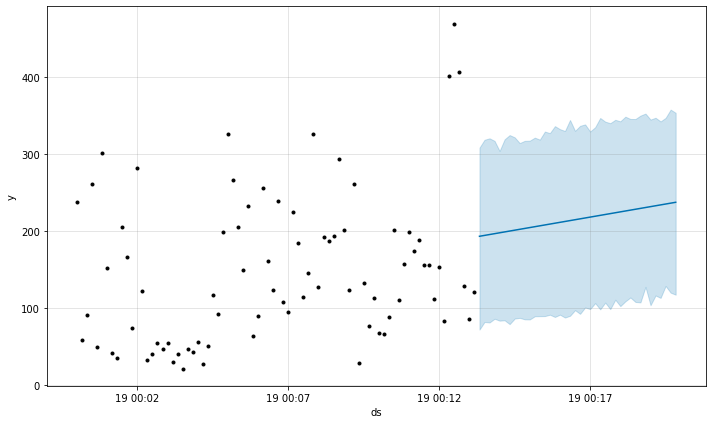

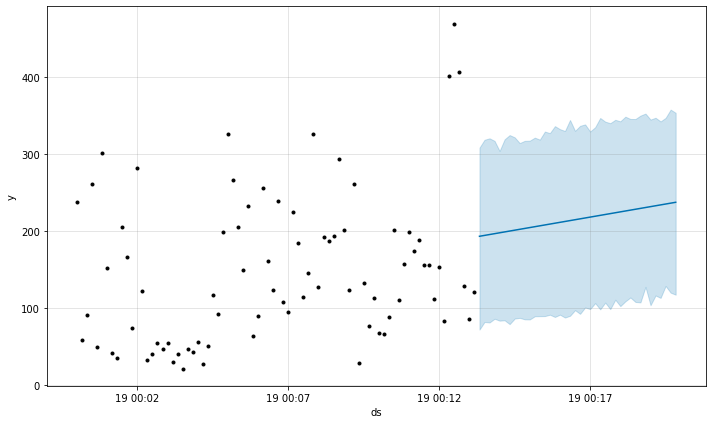

In [45]:
model.plot(prediction)

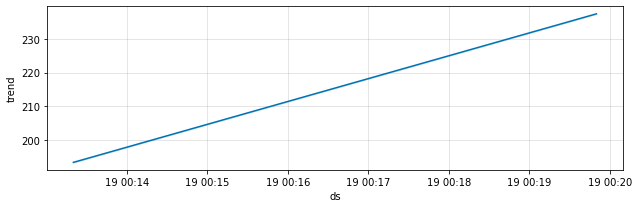

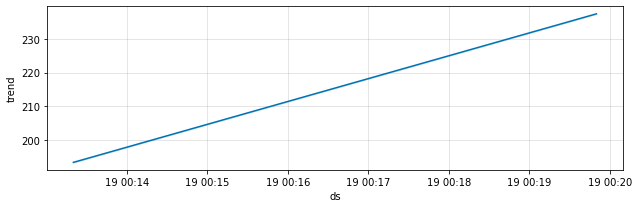

In [46]:
model.plot_components(prediction)

In [51]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-19 00:13:20,193.304661,73.336449,311.655378,193.304661,193.304661,0.0,0.0,0.0,0.0,0.0,0.0,193.304661
1,2019-03-19 00:13:30,194.437796,81.187704,311.420702,194.437796,194.437796,0.0,0.0,0.0,0.0,0.0,0.0,194.437796
2,2019-03-19 00:13:40,195.570931,75.210553,311.560827,195.570931,195.570931,0.0,0.0,0.0,0.0,0.0,0.0,195.570931
3,2019-03-19 00:13:50,196.704065,77.950615,316.447619,196.704065,196.704066,0.0,0.0,0.0,0.0,0.0,0.0,196.704065
4,2019-03-19 00:14:00,197.837200,79.461280,310.811082,197.837200,197.837200,0.0,0.0,0.0,0.0,0.0,0.0,197.837200


In [62]:
prediction_copy = prediction[['ds','trend']]
prediction_copy = prediction_copy.drop(columns='ds')
prediction_copy.head()

,trend_lower
0,193.304661
1,194.437796
2,195.570931
3,196.704065
4,197.837200


In [58]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-19 00:13:20,193.304661,73.336449,311.655378,193.304661,193.304661,0.0,0.0,0.0,0.0,0.0,0.0,193.304661
1,2019-03-19 00:13:30,194.437796,81.187704,311.420702,194.437796,194.437796,0.0,0.0,0.0,0.0,0.0,0.0,194.437796
2,2019-03-19 00:13:40,195.570931,75.210553,311.560827,195.570931,195.570931,0.0,0.0,0.0,0.0,0.0,0.0,195.570931
3,2019-03-19 00:13:50,196.704065,77.950615,316.447619,196.704065,196.704066,0.0,0.0,0.0,0.0,0.0,0.0,196.704065
4,2019-03-19 00:14:00,197.837200,79.461280,310.811082,197.837200,197.837200,0.0,0.0,0.0,0.0,0.0,0.0,197.837200


In [63]:
prediction_copy.to_excel("Solution.xlsx")

# New Section